In [30]:
import json
import pandas as pd 
from tqdm import tqdm

In [32]:
def read_data(fpath, is_test=False):
  if is_test:
    data = {'id': [], 'text': [], 'image': []}
    js_obj = json.load(open(fpath, encoding='utf-8'))
    for obj in tqdm(js_obj):
      data['id'].append(obj['id'])
      data['image'].append(obj['img_path'])
      data['text'].append(obj['text'])
  else:
    data = {'id': [], 'text': [], 'image': [], 'label': []}
    js_obj = json.load(open(fpath, encoding='utf-8'))
    for obj in tqdm(js_obj):
      data['id'].append(obj['id'])
      data['image'].append(obj['img_path'])
      data['text'].append(obj['text'])
      data['label'].append(obj['class_label'])
  return pd.DataFrame.from_dict(data)

train = read_data("../data/arabic_memes_propaganda_araieval_24_train.json")
labels = read_data("../data/arabic_memes_propaganda_araieval_24_dev.json")
preds = pd.read_csv("task2C_kevinmathew 2.tsv", sep='\t')
train.shape, labels.shape, preds.shape

100%|██████████| 312/312 [00:00<00:00, 936737.90it/s]


((2143, 4), (312, 4), (312, 3))

In [7]:
labels["correct"] = labels["label"] == preds["label"]
labels

,id,text,image,label,correct
0,data/arabic_memes_fb_insta_pinterest/Instagram...,- انا من حقي اقول اني مبحبش الشتا \n= وانا من ...,data/arabic_memes_fb_insta_pinterest/Instagram...,not_propaganda,True
1,data/arabic_memes_fb_insta_pinterest/Pinterest...,أنا مش هضعف تاني قصادك أنا مش هرجع ابص ورايا.....,data/arabic_memes_fb_insta_pinterest/Pinterest...,not_propaganda,True
2,data/arabic_memes_fb_insta_pinterest/Instagram...,-لما الكراش يتجاهلني\n=..\nMe\nده باين عليه بي...,data/arabic_memes_fb_insta_pinterest/Instagram...,not_propaganda,True
3,data/arabic_memes_fb_insta_pinterest/Pinterest...,الطفل لما يخلوه مع\nمع الأب\nمع الأم\nمع الأخت...,data/arabic_memes_fb_insta_pinterest/Pinterest...,not_propaganda,True
4,data/arabic_memes_fb_insta_pinterest/Instagram...,هي بقي نونوت معايا اقولك كل واحد فينا يروح لحا...,data/arabic_memes_fb_insta_pinterest/Instagram...,not_propaganda,True
...,...,...,...,...,...
307,data/fb_memes/ArabianMemez/272646015_128128777...,نضال الفيمنست وهي فاتحة نت \nفاتحة نت من اخترا...,data/fb_memes/ArabianMemez/272646015_128128777...,propaganda,False
308,data/arabic_memes_fb_insta_pinterest/Instagram...,أبو أحمد اتبهدل معانا أوي يجما عه\nتب9نحمد\nأن...,data/arabic_memes_fb_insta_pinterest/Instagram...,not_propaganda,True
309,data/arabic_memes_fb_insta_pinterest/Pinterest...,ابوك وامك بعد ما ربوك على ان مفيش راجل بيعيط و...,data/arabic_memes_fb_insta_pinterest/Pinterest...,not_propaganda,True
310,data/arabic_memes_fb_insta_pinterest/Instagram...,لما اعطس ف الحمام واقول الحمد لله * * وافتكر ا...,data/arabic_memes_fb_insta_pinterest/Instagram...,not_propaganda,True


وزير الصحة طه المتوكل يصرح أنه الكادر الصحي في اليمن سوف يكتشف علاج لكورونا

الأطباء والصيادلة اليمنيين

مين ...أنا؟! 

الأطباء والصيادلة اليمنيين

شكرا على ثقتك الغالية



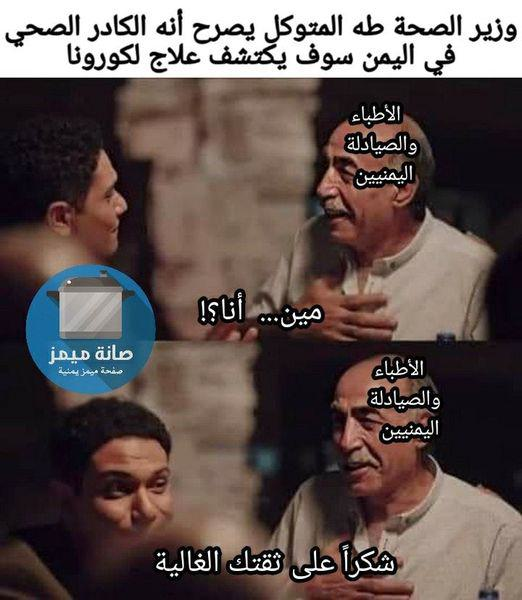

In [29]:
k = 2

from IPython.display import Image, display

# Display an image from a URL
print(labels[labels["correct"] == False]['text'].tolist()[k])
display(Image(filename="../data/" + labels[labels["correct"] == False]['id'].tolist()[k]))
